# Dual Grid Construction

A dual grid is a secondary grid built from a grid, by constructing new faces over the original grids nodes. One property of this means that if you take the dual grid of a dual grid, the orignal grid will be constructed. However, this will only work properly if the grid is not partial. UXarray allows the constructing of this dual grid on all three of our data structures using the following methods:

* `Grid.get_dual()`
* `UxDataArray.get_dual()`
* `UxDataset.get_dual()`

In [12]:
import warnings

import cartopy.crs as ccrs

import uxarray as ux

warnings.filterwarnings("ignore")

In [13]:
file = "../../test/meshfiles/mpas/QU/mesh.QU.1920km.151026.nc"

uxds = ux.open_dataset(file, file)

## Computing the Dual Grid

When computing the dual of a grid, the original grid is typically referred to as the "Primal" grid. The corner nodes of the Primal grid become the face centers of the Dual grid, and the face centers of the Primal grid become the corner nodes of the Dual grid. This means that variables that were originally face-centered on the Primal grid will be node-centered on the Dual grid, and vice versa. Using UXarray we can construct the dual mesh using `grid.compute_dual()`, which returns a new `Grid` object.

In [14]:
grid = uxds.uxgrid

In [15]:
dual = grid.get_dual()

In [16]:
(
    grid.plot(title="Primal Grid", backend="bokeh", projection=ccrs.Orthographic())
    + dual.plot(title="Dual Grid", backend="bokeh", projection=ccrs.Orthographic())
)

:Layout
   .Path.I  :Path   [Longitude,Latitude]
   .Path.II :Path   [Longitude,Latitude]

In [17]:
(
    grid.plot(backend="bokeh", projection=ccrs.Orthographic(), color="red")
    * dual.plot(backend="bokeh", projection=ccrs.Orthographic(), color="blue")
).opts(title="Primal (Red) & Dual (Blue) Grids")

:Overlay
   .Path.I  :Path   [Longitude,Latitude]
   .Path.II :Path   [Longitude,Latitude]

## Computing the Dual Grid with Data

We can also take a dual mesh of a `UxDataArray`. The concept for constructing the `Grid` remains the same, and what is constructed will be identical. The difference is the data stored inside the `UxDataArray` will be transfered with the dual mesh. The key differences is the location that the data is stored. The data transfer process works as follows:

* Face centered data becomes node centered, as each face becomes a node in the dual mesh.
* Node centered data becomes face centered, as each node becomes a face in the dual mesh.
* Edge centered data remains unchanged, as the edge centers will remain in the same place, despite the edges themselves being different.

### Face Centered Data

When constructing the dual mesh paired with a face centered variable, the data becomes node centered. We can then plot this using `topological_mean` to get the dual data to the faces for proper visualization comparisions.

In [18]:
uxds_dual_face = uxds["latCell"].get_dual()

:Layout
   .Image.I  :Image   [Longitude,Latitude]   (Longitude_Latitude latCell)
   .Image.II :Image   [Longitude,Latitude]   (Longitude_Latitude latCell)
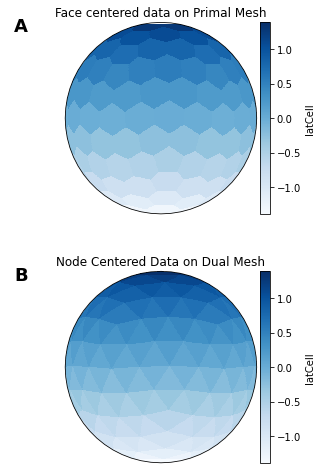

In [19]:
(
    uxds["latCell"].plot.polygons(
        rasterize=True,
        backend="matplotlib",
        title="Face centered data on Primal Mesh",
        cmap="Blues",
        projection=ccrs.Orthographic(),
    )
    + uxds_dual_face.topological_mean(destination="face").plot.polygons(
        rasterize=True,
        backend="matplotlib",
        title="Node Centered Data on Dual Mesh",
        cmap="Blues",
        projection=ccrs.Orthographic(),
    )
).cols(1).opts(fig_size=125)

### Node Centered Data

When constructing the dual mesh paired with a node centered variable, the data becomes face centered. A benefit of computing the dual of a node centered variable is that it allows us to visualize the data as polygons.

In [20]:
uxds_dual_node = uxds["latVertex"].get_dual()

:Layout
   .Image.I  :Image   [Longitude,Latitude]   (Longitude_Latitude latVertex)
   .Image.II :Image   [Longitude,Latitude]   (Longitude_Latitude latVertex)
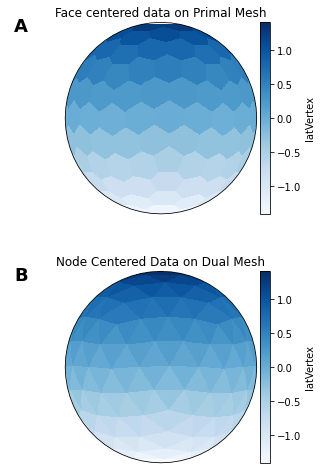

In [21]:
(
    uxds["latVertex"]
    .topological_mean(destination="face")
    .plot.polygons(
        rasterize=True,
        backend="matplotlib",
        title="Face centered data on Primal Mesh",
        cmap="Blues",
        projection=ccrs.Orthographic(),
    )
    + uxds_dual_node.plot.polygons(
        rasterize=True,
        backend="matplotlib",
        title="Node Centered Data on Dual Mesh",
        cmap="Blues",
        projection=ccrs.Orthographic(),
    )
).cols(1).opts(fig_size=125)

### Edge Centered Data

When constructing the dual mesh paired with an edge centered variable, the data will stay edge centered. However, a plotting example cannot be shown, as the `topological_mean` needed to visualize edge centered data is not currently implemented for edge centered data.

### UxDataset

We can also construct a dual mesh from an entire dataset, which will convert the whole `UxDataset` to its dual mesh form. Below we can see the dataset before the dual mesh is constructed.

In [22]:
uxds

<xarray.UxDataset> Size: 176kB
Dimensions:               (n_face: 162, n_edge: 480, n_node: 320,
                           n_max_face_nodes: 6, maxEdges2: 12, TWO: 2,
                           vertexDegree: 3)
Dimensions without coordinates: n_face, n_edge, n_node, n_max_face_nodes,
                                maxEdges2, TWO, vertexDegree
Data variables: (12/42)
    latCell               (n_face) float64 1kB 0.4636 0.4636 ... -0.8188 -0.8188
    lonCell               (n_face) float64 1kB ...
    xCell                 (n_face) float64 1kB ...
    yCell                 (n_face) float64 1kB ...
    zCell                 (n_face) float64 1kB ...
    indexToCellID         (n_face) int32 648B ...
    ...                    ...
    cellQuality           (n_face) float64 1kB ...
    gridSpacing           (n_face) float64 1kB ...
    triangleQuality       (n_node) float64 3kB ...
    triangleAngleQuality  (n_node) float64 3kB ...
    obtuseTriangle        (n_node) int32 1kB ...
    meshDensity           (n_face) float64 1kB ...

Now we can construct the dual and see the new dataset that is returned.

In [23]:
uxds_dual = uxds.get_dual()

In [24]:
uxds_dual

<xarray.UxDataset> Size: 176kB
Dimensions:               (n_node: 162, n_edge: 480, n_face: 320,
                           n_max_face_nodes: 6, maxEdges2: 12, TWO: 2,
                           vertexDegree: 3)
Dimensions without coordinates: n_node, n_edge, n_face, n_max_face_nodes,
                                maxEdges2, TWO, vertexDegree
Data variables: (12/42)
    latCell               (n_node) float64 1kB 0.4636 0.4636 ... -0.8188 -0.8188
    lonCell               (n_node) float64 1kB 3.23 4.486 0.0 ... 3.009 3.45
    xCell                 (n_node) float64 1kB -0.891 -0.2005 ... -0.6508
    yCell                 (n_node) float64 1kB -0.07869 -0.8717 ... -0.2075
    zCell                 (n_node) float64 1kB 0.4472 0.4472 ... -0.7303 -0.7303
    indexToCellID         (n_node) int32 648B 1 2 3 4 5 ... 158 159 160 161 162
    ...                    ...
    cellQuality           (n_node) float64 1kB 1.0 1.0 1.0 ... 0.8565 0.8565
    gridSpacing           (n_node) float64 1kB 0.2728 0.2728 ... 0.3051 0.3051
    triangleQuality       (n_face) float64 3kB 0.8577 0.8577 0.8577 ... 1.0 1.0
    triangleAngleQuality  (n_face) float64 3kB 0.8315 0.8315 0.7619 ... 1.0 1.0
    obtuseTriangle        (n_face) int32 1kB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    meshDensity           (n_node) float64 1kB 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0

As you can see, transforms the whole dataset. We can now take any variable and plot it, as shown below.

:Image   [Longitude,Latitude]   (Longitude_Latitude latVertex)
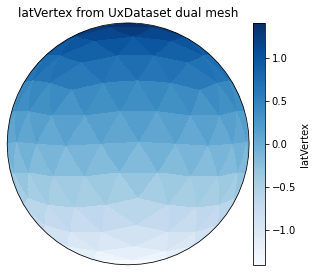

In [25]:
uxds_dual["latVertex"].plot.polygons(
    rasterize=True,
    backend="matplotlib",
    title="latVertex from UxDataset dual mesh",
    cmap="Blues",
    projection=ccrs.Orthographic(),
).opts(fig_size=120)